In [4]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [2]:
bath = pd.read_csv("업종별/욕탕업.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

In [3]:
print(bath.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259567 entries, 0 to 259566
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      259567 non-null  object
 1   CARD_SIDO_NM  259567 non-null  object
 2   CARD_CCG_NM   258811 non-null  object
 3   STD_CLSS_NM   259567 non-null  object
 4   HOM_SIDO_NM   259567 non-null  object
 5   HOM_CCG_NM    258199 non-null  object
 6   AGE           259567 non-null  object
 7   SEX_CTGO_CD   259567 non-null  int64 
 8   FLC           259567 non-null  int64 
 9   CSTMR_CNT     259567 non-null  int64 
 10  AMT           259567 non-null  int64 
 11  CNT           259567 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 25.7+ MB
None


In [6]:
#안쓰는 컬럼 드랍
df=bath.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'STD_CLSS_NM'], axis=1)

In [7]:
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [8]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259567 entries, 0 to 259566
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      259567 non-null  object
 1   CARD_SIDO_NM  259567 non-null  object
 2   HOM_SIDO_NM   259567 non-null  object
 3   AGE           259567 non-null  object
 4   SEX_CTGO_CD   259567 non-null  int64 
 5   FLC           259567 non-null  int64 
 6   CSTMR_CNT     259567 non-null  int64 
 7   AMT           259567 non-null  int64 
 8   CNT           259567 non-null  int64 
 9   year          259567 non-null  int64 
 10  month         259567 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 23.8+ MB
None
  REG_YYMM CARD_SIDO_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT  \
0   201901           강원          강원  20s            1    1         89   
1   201901           강원          강원  20s            1    2         12   
2   201901           강원          강원  20s            2  

In [9]:
df.CARD_SIDO_NM.unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [10]:
df.HOM_SIDO_NM.unique()

array(['강원', '경기', '경북', '대전', '서울', '인천', '대구', '부산', '울산', '충북', '전북',
       '충남', '제주', '전남', '경남', '세종', '광주'], dtype=object)

CARD_SIDO_NM
세종      489375560
제주     3085738495
강원     3235384981
충북     3385381250
대전     3654415226
전남     3730296239
광주     5150089078
충남     5522261410
전북     6232910606
울산     7359824411
경북     8521607576
대구    10155890582
인천    10289432276
경남    17027681029
부산    21945193707
서울    38977865371
경기    41321292310
Name: AMT, dtype: int64


Text(0.5, 1.0, '지역별 AMT')

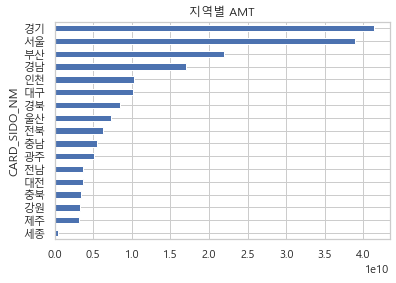

In [11]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
print(df1)
df1.plot(kind="barh")
plt.title("지역별 AMT")

REG_YYMM
201901    17604990872
201902    15968260787
201903    14847817907
201904    12823552324
201905    11226973502
201906     9843874745
201907    10073816644
201908     9685797788
201909    11311659175
201910    11613463174
201911    13372519857
201912    17479974261
202001    17884794306
202002     9496420875
202003     6850723890
Name: AMT, dtype: int64


Text(0.5, 1.0, '기간별 AMT')

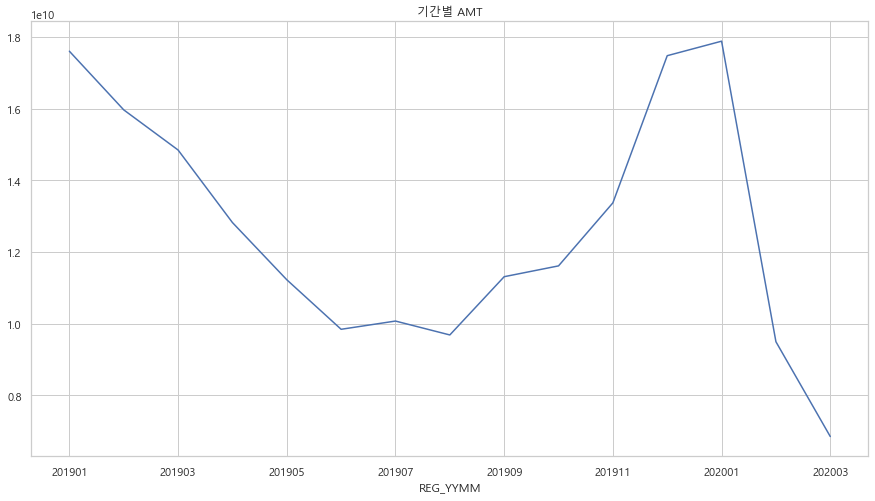

In [12]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
print(df2)
df2.plot(figsize=(15,8))
plt.title("기간별 AMT")

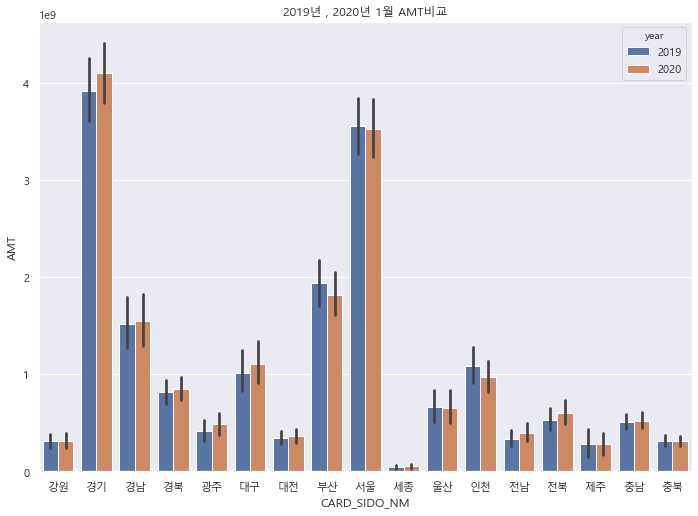

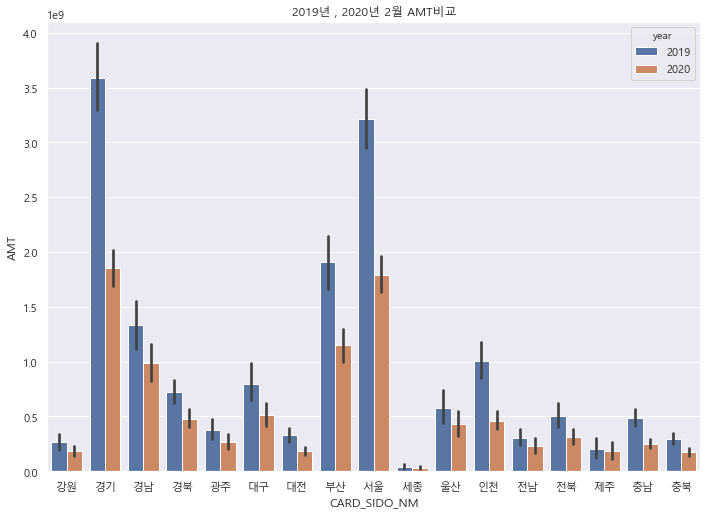

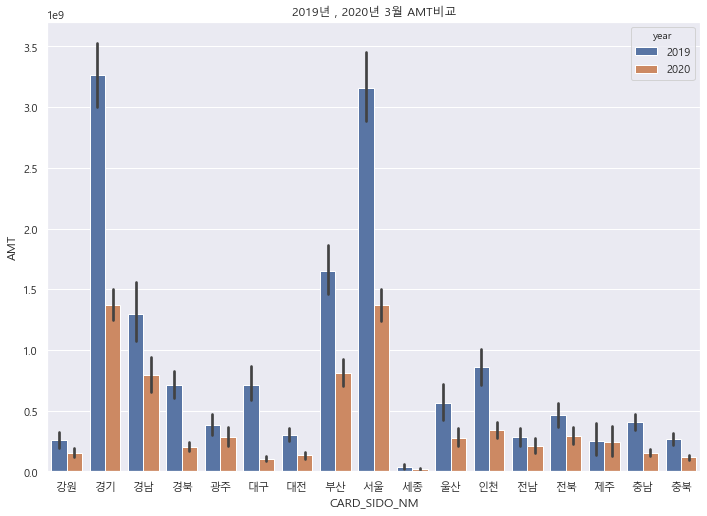

In [13]:
for i in range(1, 4):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

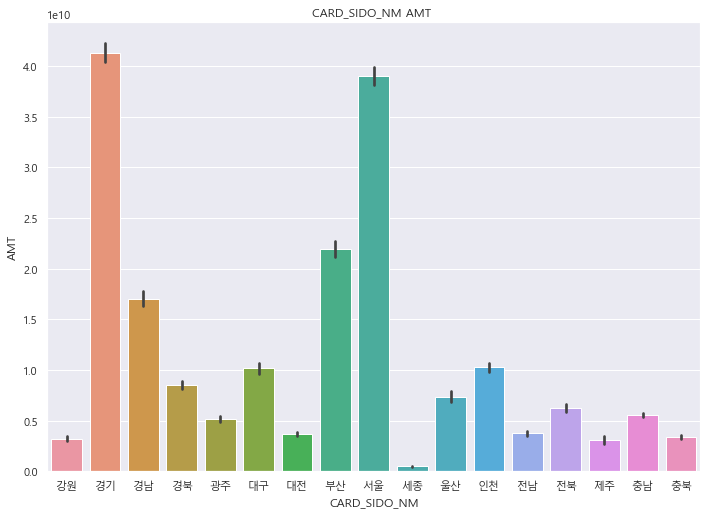

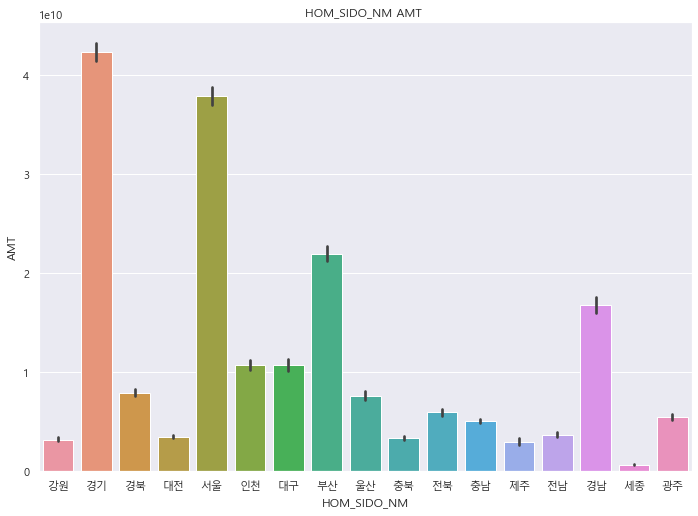

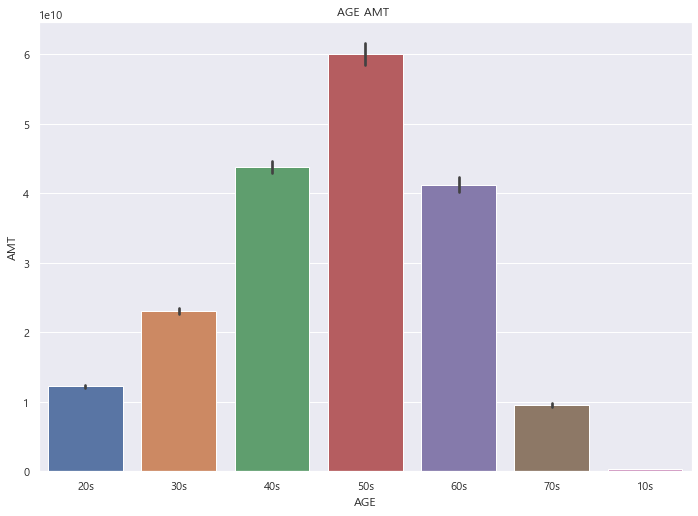

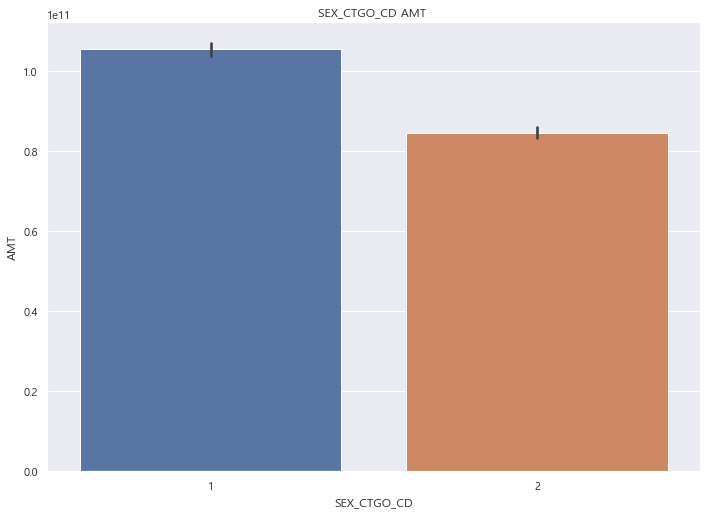

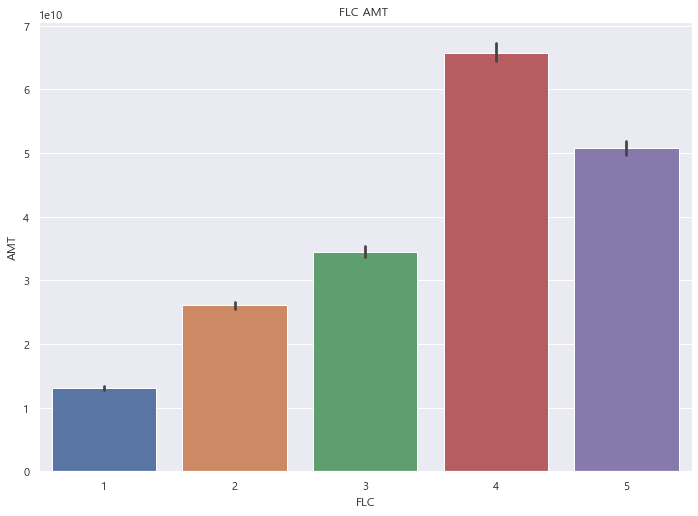

In [14]:
cols = ['CARD_SIDO_NM', 'HOM_SIDO_NM','AGE','SEX_CTGO_CD', 'FLC']
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df, y = 'AMT', x = val, orient = 'v',estimator = sum)
    plt.title(val +' AMT ')
    plt.show()

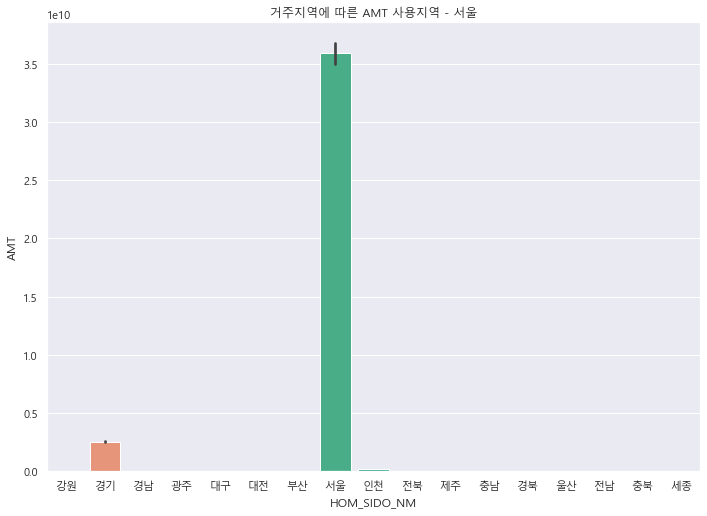

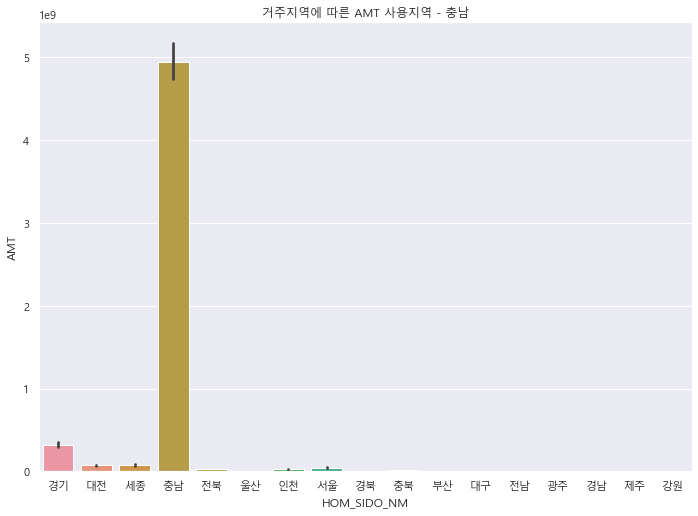

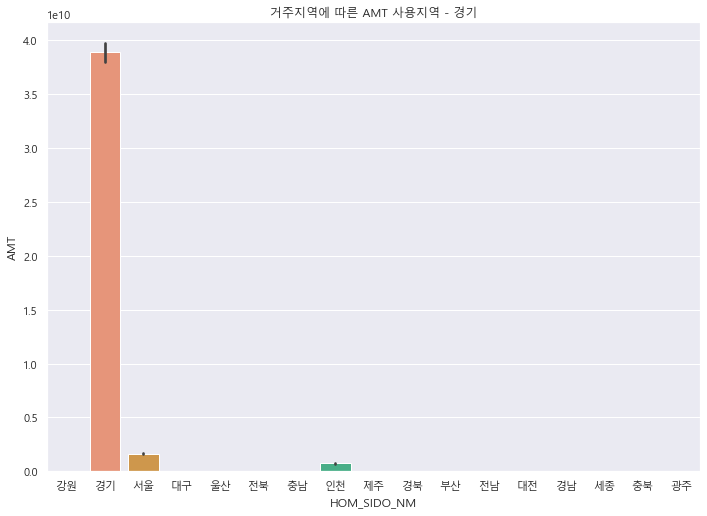

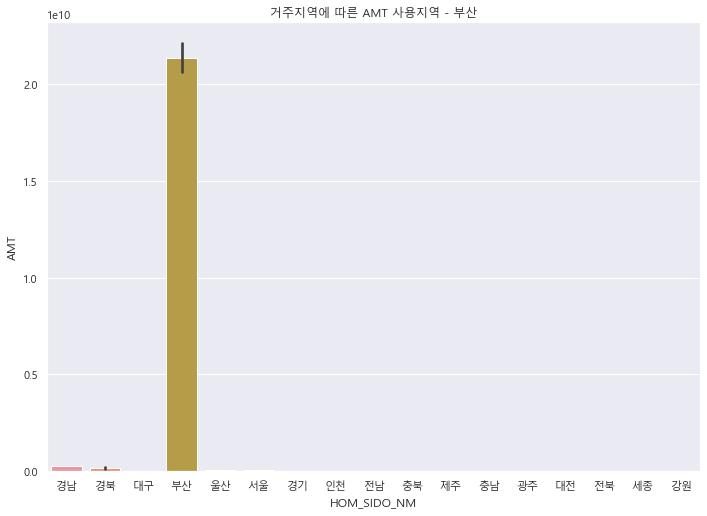

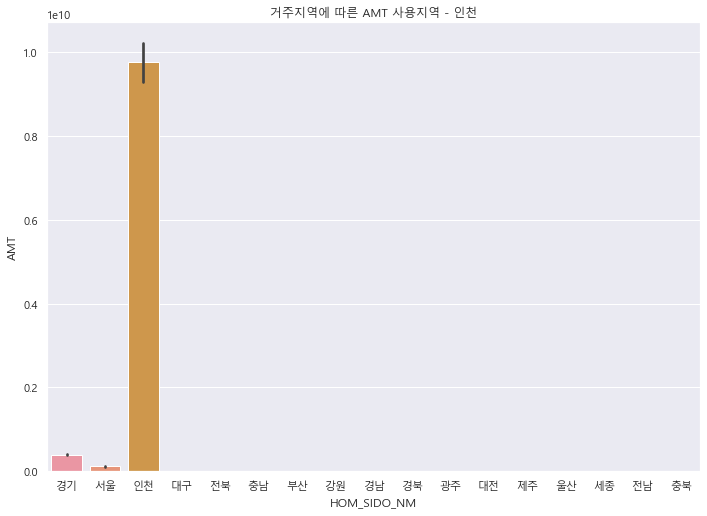

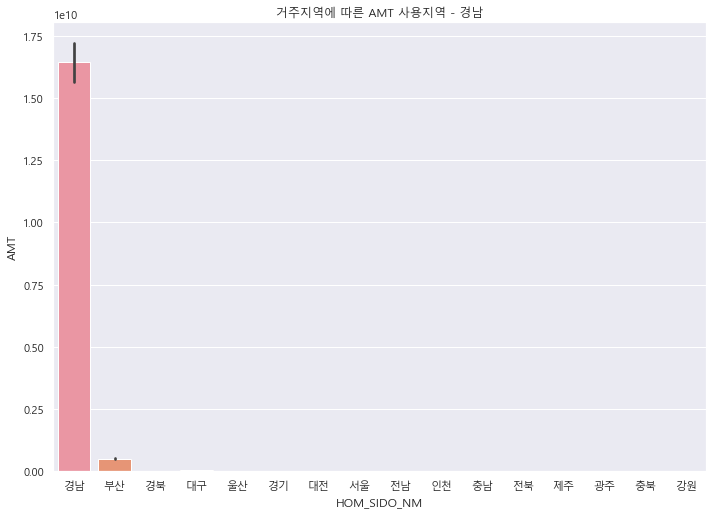

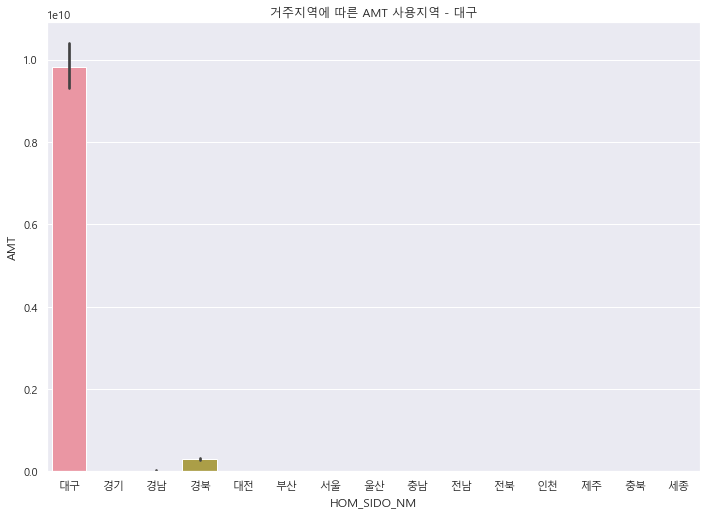

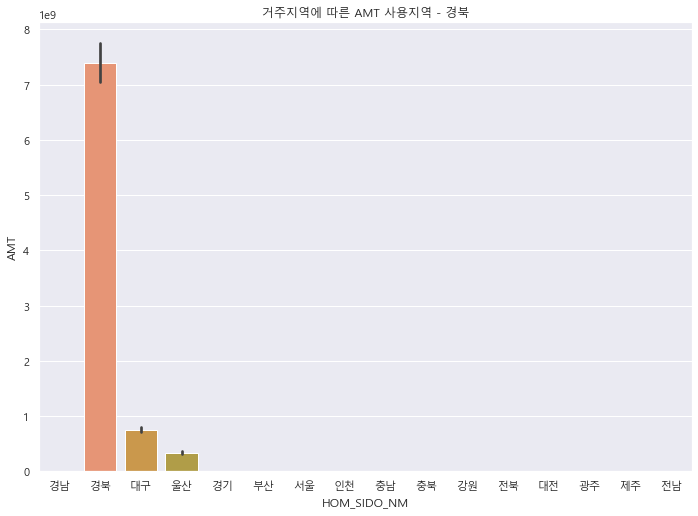

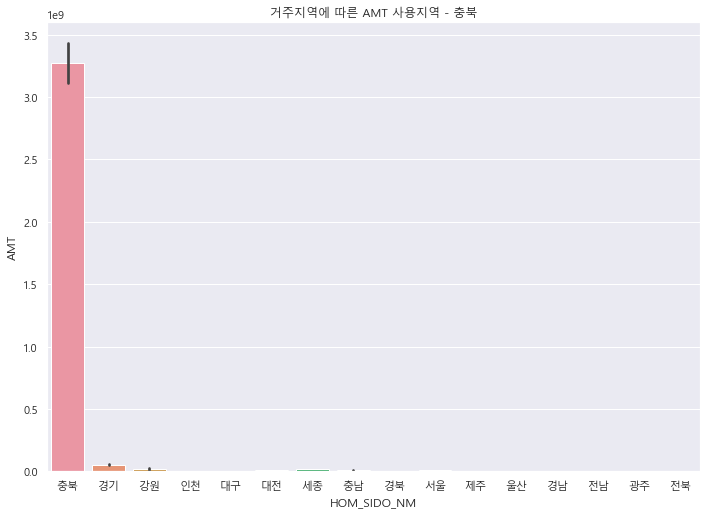

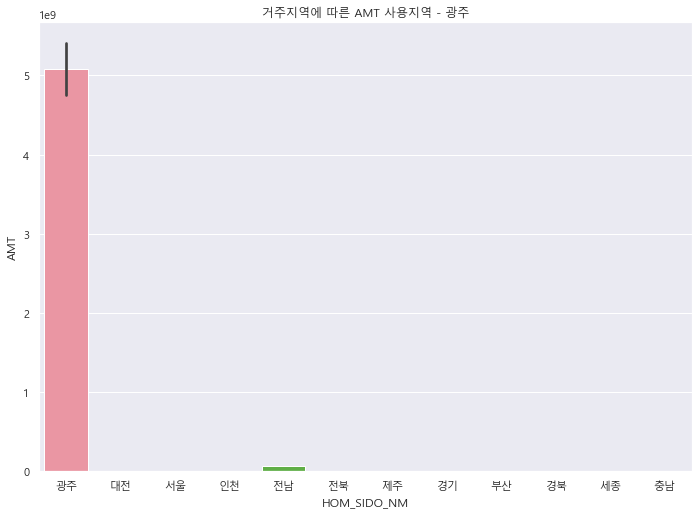

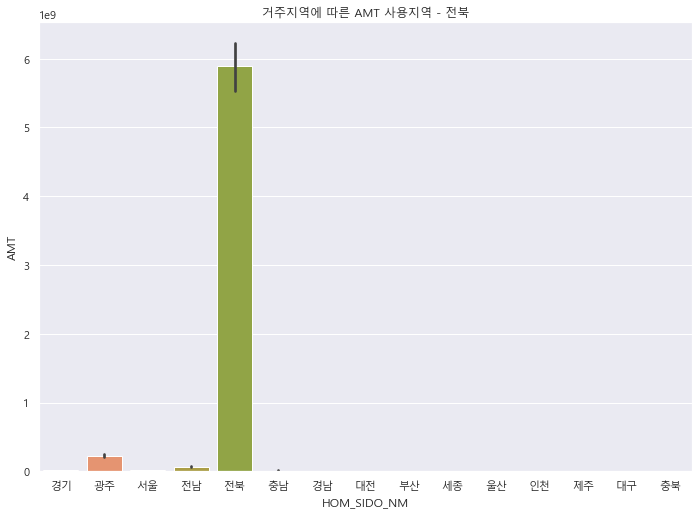

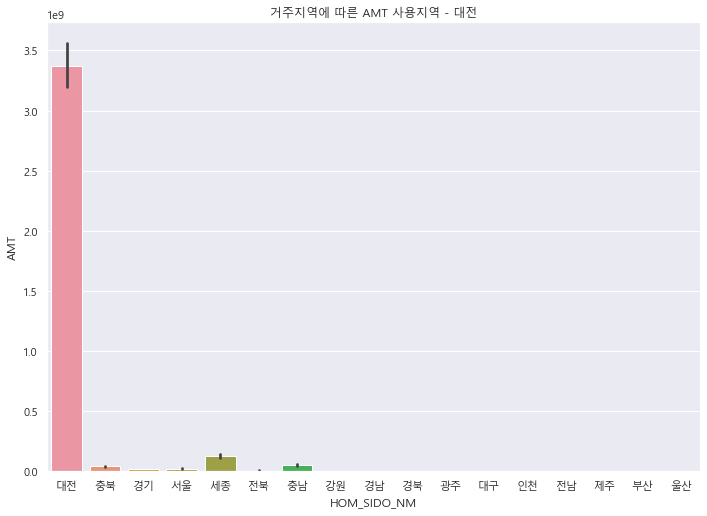

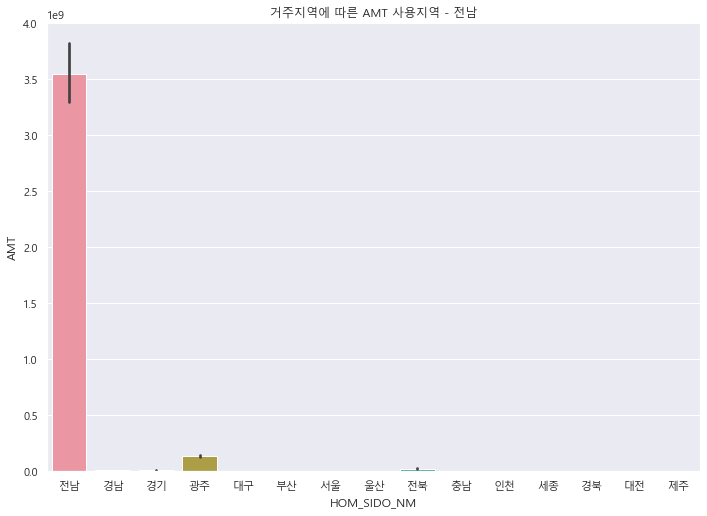

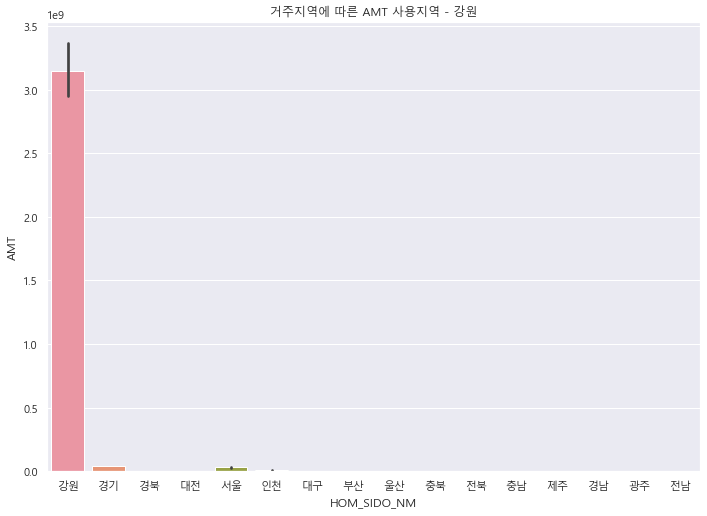

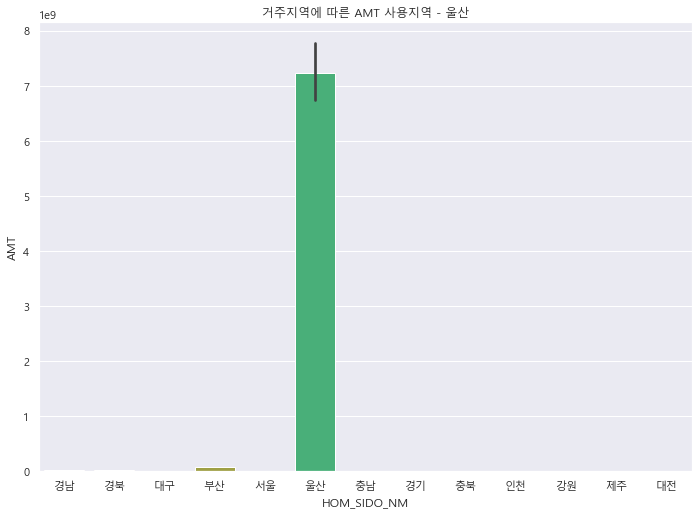

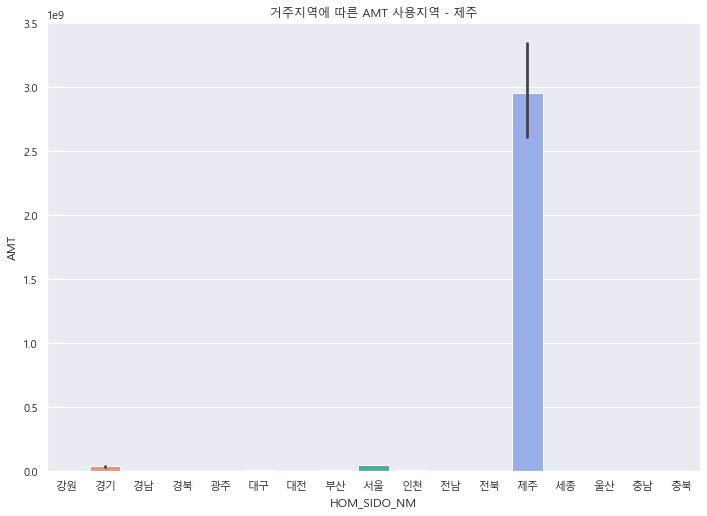

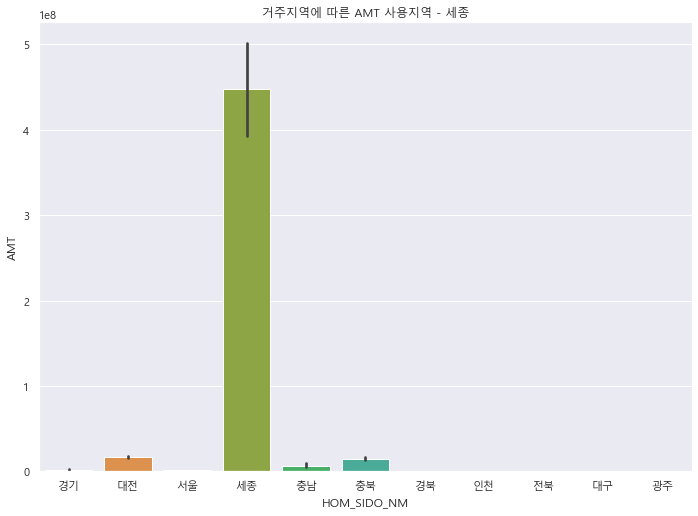

In [15]:
cols = ['서울', '충남', '경기', '부산', '인천','경남', '대구', '경북', '충북', '광주','전북','대전', '전남', '강원', '울산', '제주', '세종']
    
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df[df.CARD_SIDO_NM == val], x = 'HOM_SIDO_NM', y = 'AMT',  estimator = sum)
    plt.title('거주지역에 따른 AMT 사용지역 - ' + val)
    plt.show()